In [3]:
!pip install dgl


In [4]:
import pandas as pd
import numpy as np
import dgl
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [5]:
# Load normal and abnormal datasets
df_normal = pd.read_csv("/content/ptbdb_normal.csv")
df_abnormal = pd.read_csv("/content/ptbdb_abnormal.csv")

In [6]:
print('shape of df_normal is:',df_normal.shape)
print('shape of df_abnormal is:',df_normal.shape)

shape of df_normal is: (4045, 188)
shape of df_abnormal is: (4045, 188)


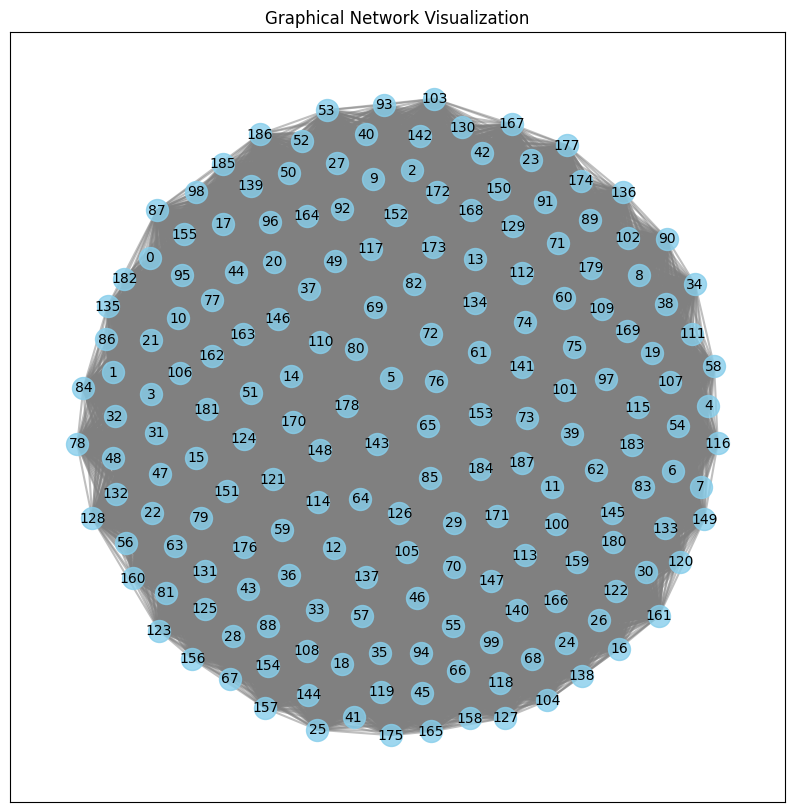

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.complete_graph(len(df_normal.columns))

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the graph with enhanced visual properties
pos = nx.spring_layout(G, k=0.3)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=250, node_color='skyblue', alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.5, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title('Graphical Network Visualization')
plt.gca().set_facecolor('white')  # Set the background color to white
plt.show()


# **Multivariate Graphs**

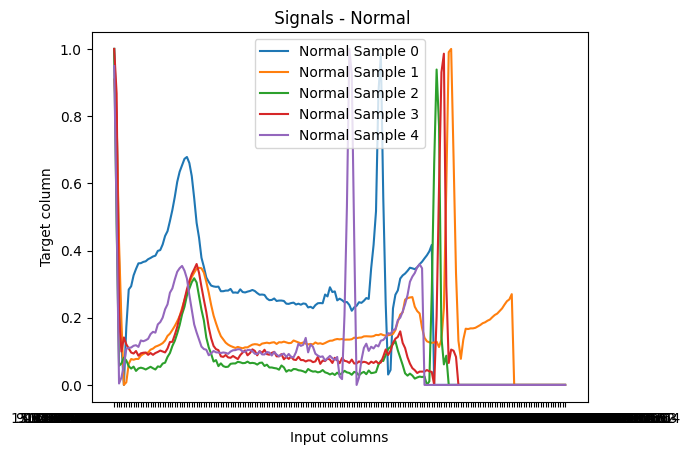

In [ ]:
import matplotlib.pyplot as plt

# Plot  signals for a few samples in normal dataset
for i in range(5):  # Plot 5 samples
    plt.plot(df_normal.iloc[i, :-1], label=f'Normal Sample {i}')

plt.title(' Signals - Normal')
plt.xlabel('Input columns')
plt.ylabel('Target column')
plt.legend()
plt.show()

# Plot  signals for a few samples in abnormal dataset
for i in range(5):  # Plot 5 samples
    plt.plot(df_abnormal.iloc[i, :-1], label=f'Abnormal Sample {i}')

plt.title('Signals - Abnormal')
plt.xlabel('Input columns')
plt.ylabel('Target')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot ECG signals for a few samples in normal dataset
for i in range(5):  # Plot 5 samples
    plt.plot(df_normal.columns, df_normal.iloc[i, :], label=f'Normal Sample {i}')

plt.plot(df_normal.columns, df_normal.iloc[0, -1] * np.ones(len(df_normal.columns)), label='Y-axis - Normal')

plt.title('ECG Signals - Normal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Plot ECG signals for a few samples in abnormal dataset
for i in range(5):  # Plot 5 samples
    plt.plot(df_abnormal.columns, df_abnormal.iloc[i, :], label=f'Abnormal Sample {i}')

plt.plot(df_abnormal.columns, df_abnormal.iloc[0, -1] * np.ones(len(df_abnormal.columns)), label='Y-axis - Abnormal')

plt.title('ECG Signals - Abnormal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for ECG signals in normal dataset
for i in range(5):  # Plot 5 samples
    plt.scatter(df_normal.columns[:-1], df_normal.iloc[i, :-1], label=f'Normal Sample {i}')

plt.axhline(y=df_normal.iloc[0, -1], color='r', linestyle='-', label='Y-axis - Normal')

plt.title('Scatter Plot - ECG Signals (Normal)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Scatter plot for ECG signals in abnormal dataset
for i in range(5):  # Plot 5 samples
    plt.scatter(df_abnormal.columns[:-1], df_abnormal.iloc[i, :-1], label=f'Abnormal Sample {i}')

plt.axhline(y=df_abnormal.iloc[0, -1], color='r', linestyle='-', label='Y-axis - Abnormal')

plt.title('Scatter Plot - ECG Signals (Abnormal)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


# **Split Normal data in X & Y**

In [7]:
X_normal = df_normal.iloc[:, :-1]  # Exclude the last column
y_normal = df_normal.iloc[:,-1]

# **Split Normal data in X & Y**

In [8]:
X_abnormal = df_abnormal.iloc[:, :-1]  # Exclude the last column
y_abnormal = df_abnormal.iloc[:,-1]

# **Split data into train and test**

In [9]:
from sklearn.model_selection import train_test_split

# Split the abnormal dataset
X_abnormal_train, X_abnormal_test, y_abnormal_train, y_abnormal_test = train_test_split(
    X_abnormal, y_abnormal, test_size=0.2, random_state=42
)

# Split the normal dataset
X_normal_train, X_normal_test, y_normal_train, y_normal_test = train_test_split(
    X_normal, y_normal, test_size=0.2, random_state=42
)


## **Concatenate training and testing data**

In [10]:
X_train = np.concatenate([X_abnormal_train, X_normal_train], axis=0)
y_train = np.concatenate([y_abnormal_train, y_normal_train], axis=0)


In [11]:
X_test = np.concatenate([X_abnormal_test, X_normal_test], axis=0)
y_test = np.concatenate([y_abnormal_test, y_normal_test], axis=0)

In [12]:
print("Unique labels in training set:", np.unique(y_train))
print("Unique labels in testing set:", np.unique(y_test))


Unique labels in training set: [ 0.  1. nan]
Unique labels in testing set: [0. 1.]


#  **Apply StandardScaler to X_train and X_test separately**


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Convert to PyTorch tensors


In [52]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

<ipython-input-52-155b76b660fd>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.long)
<ipython-input-52-155b76b660fd>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [17]:
# Create a fully connected graph
G = dgl.graph((np.arange(len(X_train_tensor)), np.arange(len(X_train_tensor))))

In [18]:
# Define a Graph Neural Network (GNN) model
class GNNModel(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GNNModel, self).__init__()
        self.fc1 = nn.Linear(in_feats, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, g, features):
        x = F.relu(self.fc1(features))
        x = self.fc2(x)
        return x

In [19]:
# Instantiate the GNN model
in_feats = X_train_tensor.shape[1]
hidden_size = 64
num_classes = 2
model = GNNModel(in_feats, hidden_size, num_classes)


In [20]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [54]:
print("Unique labels in training set:", np.unique(y_train_tensor.numpy()))
# there is an invalid value that why we remove it below


Unique labels in training set: [-9223372036854775808                    0                    1]


In [55]:
# Filter out samples with invalid labels
valid_indices = (y_train_tensor >= 0).nonzero(as_tuple=True)[0]
X_train_tensor_valid = X_train_tensor[valid_indices]
y_train_tensor_valid = y_train_tensor[valid_indices]


In [57]:
print("Unique labels in training set:", np.unique(y_train_tensor_valid.numpy()))
# Now we have only 0 & 1


Unique labels in training set: [0 1]


In [58]:
print("Label tensor data type:", y_train_tensor.dtype)


Label tensor data type: torch.int64


In [60]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    logits = model(G, X_train_tensor_valid)
    loss = criterion(logits, y_train_tensor_valid)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation on training set
    with torch.no_grad():
        model.eval()
        predictions = torch.argmax(logits, dim=1)
        accuracy = torch.sum(predictions == y_train_tensor_valid).item() / len(y_train_tensor_valid)
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')


Epoch 1/100, Loss: 0.0570, Accuracy: 0.9876
Epoch 2/100, Loss: 0.0568, Accuracy: 0.9881
Epoch 3/100, Loss: 0.0566, Accuracy: 0.9876
Epoch 4/100, Loss: 0.0564, Accuracy: 0.9882
Epoch 5/100, Loss: 0.0562, Accuracy: 0.9878
Epoch 6/100, Loss: 0.0559, Accuracy: 0.9883
Epoch 7/100, Loss: 0.0557, Accuracy: 0.9881
Epoch 8/100, Loss: 0.0555, Accuracy: 0.9883
Epoch 9/100, Loss: 0.0553, Accuracy: 0.9881
Epoch 10/100, Loss: 0.0551, Accuracy: 0.9882
Epoch 11/100, Loss: 0.0549, Accuracy: 0.9883
Epoch 12/100, Loss: 0.0547, Accuracy: 0.9883
Epoch 13/100, Loss: 0.0545, Accuracy: 0.9883
Epoch 14/100, Loss: 0.0543, Accuracy: 0.9883
Epoch 15/100, Loss: 0.0541, Accuracy: 0.9886
Epoch 16/100, Loss: 0.0539, Accuracy: 0.9886
Epoch 17/100, Loss: 0.0538, Accuracy: 0.9885
Epoch 18/100, Loss: 0.0536, Accuracy: 0.9886
Epoch 19/100, Loss: 0.0534, Accuracy: 0.9886
Epoch 20/100, Loss: 0.0532, Accuracy: 0.9887
Epoch 21/100, Loss: 0.0530, Accuracy: 0.9888
Epoch 22/100, Loss: 0.0528, Accuracy: 0.9886
Epoch 23/100, Loss:

In [62]:
# Make predictions on the test set
with torch.no_grad():
    model.eval()
    logits_test = model(G, X_test_tensor)
    predictions_test = torch.argmax(logits_test, dim=1)

In [63]:
# Report classification metrics on the test set
print(classification_report(y_test_tensor, predictions_test.numpy()))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       809
           1       0.97      0.95      0.96      1205

    accuracy                           0.95      2014
   macro avg       0.95      0.95      0.95      2014
weighted avg       0.95      0.95      0.95      2014

